# <span style='color:blue'>Lab 3</span>
# <span style='color:blue'> <u>Association Rule Mining, Clustering, or Collaborative Filtering </u></span>

## Group Members
- Helene Barrera
- Feby Thomas
- John Olanipekun
- Justin Ehly

## <span style='color:blue'><u> Lab 3 Executive Summary </u></span>


---
## Instructions
In the final assignment for this course, you will be using one of three different analysis methods:
- **Option A:** Use clustering on an unlabeled dataset to provide insight or features
- <span style='color:blue'>**Option B:** Use transaction data for mining associations rules</span>
- **Option C:** Use collaborative filtering to build a custom recommendation system<br><br>
Your choice of dataset will largely determine the task that you are trying to achieve, though the dataset does not need to change from your previous tasks.<br><br>
- For example, you might choose to use clustering on your data as a preprocessing step that extracts different features. Then you can use those features to build a classifier and analyze its performance in terms of accuracy (precision, recall) and speed.
- Alternatively, you might choose a completely different dataset and perform rule mining or build a recommendation system.
---

---
## Dataset Selection and Toolkits
<br>
As before, you need to choose a dataset that is not small. It might be massive in terms of the number of attributes (or transactions), classes (or items, users, etc.) or whatever is appropriate for the task you are performing. Note that scikit-learn can be used for clustering analysis, but not for Association Rule Mining (you should use R) or collaborative filtering (you should use graphlabcreate from Dato). Both can be run using Jupyter notebooks as shown in lecture.<br><br>
- One example of a recommendation dataset is the movie lens rating data: http://grouplens.org/ datasets/movielens/  
<br>
- Some examples of association rule mining datasets: http://fimi.ua.ac.be/data/ <br>
<br>
Write a report covering in detail all the steps of the project. The results need to be reproducible using only this report. <br>
Describe all assumptions you make and include all code you use in the Jupyter notebook or as supplemental functions. 
<br><br>
<b>Follow the CRISP-DM framework in your analysis (you are performing all of the CRISP-DM outline).</b>
<br><br>
<span style='color:red'> <b><u>This report is worth 20% of the final grade.</u></b>  </span>
<br>

---

---
## Business Understanding [10 points]
###### <span style='color:blue'>1. Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?).</span> 

---

We chose to use the MovieLens Small data set, officially called ML-Latest-small data set from GroupLens in order to gain experience working with transaction data and association rules mining. The dataset consists of 4 different comma separated files containing links, movies, ratings and tags. The links file contains unique ID's for each movie (movieId) in the dataset as well as each movie's corresponding IMDB (imdbId) unique ID and themoviedb.org unique ID (tmdbId).
* 100k movie ratings
* 3,600 tags
* 9,000 movies (titles)
* 600 users (by userId only)

Citations:
F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets: History and Context. ACM Transactions on Interactive Intelligent Systems (TiiS) 5, 4: 19:1–19:19. https://doi.org/10.1145/2827872

TMDB API Documentation:  
https://www.themoviedb.org/documentation/api/wrappers-libraries  
Python Library: https://github.com/celiao/tmdbsimple/    

IMDB API Documentation:
https://developer.imdb.com/documentation  

------
MoveLens Permission:<br>
Hello!

Thank you for completing the form to request dataset usage. You have been approved to use the datasets as you have described in this form (educational or academic research, NON COMMERCIAL USE). Should any usage details change, you will need to fill out the form again. You have requested to redistribute a small amount of data for your project, which has been approved for the <b>ML-Latest-small data set only</b>. Please notify us of any publications that result from this usage, and follow the guidelines laid out for usage in the associated readme file.

As described in the README file, please acknowledge your use of MovieLens Datasets in any publication or demonstration by citing this paper: F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets: History and Context. ACM Transactions on Interactive Intelligent Systems (TiiS) 5, 4: 19:1–19:19. https://doi.org/10.1145/2827872  

Please note:
On updated chrome browsers we use a secure URL for grouplens.org (https://grouplens.org) but we link to insecure access for the files (http://files.grouplens.org) and apparently chrome has decided to just ignore such clicks. Until we can fix this issue, when you click the dataset links at grouplens.org you may see a privacy error indicating that something is wrong and you shouldn't do whatever you were doing, or it may just show up as a broken link or 404 Error. 
The best workaround is to download your requested dataset through this link: <http://files.grouplens.org/datasets/movielens/> It's the same link that you find on our MovieLens Dataset page, but pointing the "insecure" version of the site because the secure version is broken. This issue is being worked on right now.

Have a great week, and happy researching!

~Laura

-- 

-----

NOTE: The University of Minnesota began working remotely on March 18th, 2020, and will do so for the indefinite future. To that end, email is the best way to contact me at this time. 

------
Assistant to Professors Stevie Chancellor, Joe Konstan, Loren Terveen, & Lana Yarosh
Administrator GroupLens Research Lab
University of Minnesota, Department of Computer Science & Engineering
200 Union Street SE, 4-192 Keller Hall
Minneapolis, MN  55455
(612)626-2057
http://grouplens.org/
https://twitter.com/grouplens

I acknowledge that the University of Minnesota stands on Miní Sóta Makhóčhe, the homelands of the Dakhóta Oyáte



###### <span style='color:blue'>2. How will you measure the effectiveness of a good algorithm? </span>
--

Ways to measure association rules mining are using Support, Confidence, Lift, Interest <b>--> we need to have a group chat about which one or ones we should focus on.</b>

###### <span style='color:blue'>3. Why does your chosen validation method make sense for this specific dataset and the stakeholders needs?</span>
--

---
## Data Understanding [20 points total]
### <span style='color:blue'>Data Wrangling [10 points]</span>
<b>Questions are answered further down after the wranling is complete and the dataset is shaped</b>

---

In [1]:
import pandas as pd
import numpy as np
import os
import time
import altair as alt
import matplotlib as mp
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import copy
%matplotlib inline
# from ICA 5
from IPython.core.display import HTML
HTML("<link href='https://fonts.googleapis.com/css?family=Passion+One' rel='stylesheet' type='text/css'><style>div.attn { font-family: 'Helvetica Neue'; font-size: 30px; line-height: 40px; color: #FFFFFF; text-align: center; margin: 30px 0; border-width: 10px 0; border-style: solid; border-color: #5AAAAA; padding: 30px 0; background-color: #DDDDFF; }hr { border: 0; background-color: #ffffff; border-top: 1px solid black; }hr.major { border-top: 10px solid #5AAA5A; }hr.minor { border: none; background-color: #ffffff; border-top: 5px dotted #CC3333; }div.bubble { width: 65%; padding: 20px; background: #DDDDDD; border-radius: 15px; margin: 0 auto; font-style: italic; color: #f00; }em { color: #AAA; }div.c1{visibility:hidden;margin:0;height:0;}div.note{color:red;}</style>")

# points to location of my R libraries
lib_loc = 'C:/Users/justi/.conda/pkgs/rpy2-3.4.4-py38r36h10235a5_0/R/win-library/4.1'

os.chdir('C:/Users/justi/GitHub/Lab 3/data')

In [2]:
# let's get some data!
ratings = pd.read_csv('ratings.csv')
items = pd.read_csv('movies.csv')
tags = pd.read_csv('tags.csv')
links = pd.read_csv('links.csv')

#print out our data
print('\n- - - - - Ratings- - - - - \n')
print(ratings.head())
print(ratings.info())
print('\n- - - - - Items- - - - - - \n')
print(items.head())
print(items.info())
print('\n- - - - - Tags- - - - - - -\n')
print(tags.head())
print(tags.info())
print('\n- - - - - Links- - - - - - \n')
print(links.head())
print(links.info())


- - - - - Ratings- - - - - 

   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None

- - - - - Items- - - - - - 

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   



---
---

##### <span style='color:blue'>Explore missing values</span>
###### ---------------items.csv---------------
---

In [3]:
# make a dataframe of missing genres and their corresponding tmdbId's so we can try to find their genres
idx = items[items.genres.str.contains('no genres')].index
idx
missing = items.iloc[idx,:]
missing = missing.merge(links, on='movieId', how='left')
print('Missing Data: %d records are missing genre from the items.csv file' % missing.movieId.count())


Missing Data: 34 records are missing genre from the items.csv file


In [4]:
# log into tmdb to pull the missing genres
# communicate with the movie database and pull all crew information for each movie in the links df
# if there's no match to the provided tmdbId then just assign the list position to 0 so we can deal with it later


# set up the the movie database library and API key
import tmdbsimple as tmdb
tmdb.API_KEY = '19f654e762815e69826afb4f2939d599'

# grab what data is available from the tmdb server 
from progressbar import ProgressBar
pbar = ProgressBar()
tm = []
for i in pbar(range(len(missing))):
    try: 
        tm.append(tmdb.Movies(missing.tmdbId[i]))
    except:
        tm.append(0)

# pull just the tmdbId's and genre information out of the downloaded list of dictionaries
# also print so we know how 
replace_miss_values = []
count = 0
for x in range(len(tm)):
    try:
        replace_miss_values.append({k: v for k,v in tm[x].info().items() if k in ['id','genres']})
    except: 
        count +=1
print('There were %d missing tmdbId\'s returned'% count)

tm_dic = [{k: v for k,v in replace_miss_values[i].items()} for i in range(len(replace_miss_values))]
#print(tm_dic)

100% |########################################################################|


There were 7 missing tmdbId's returned


In [5]:
# overall goal make a new df to fill in some of the missing genre values
ids = []
mgs = []

for i in range(len(tm_dic)):
    for r in range(len(tm_dic[i]['genres'])):
                   ids.append(tm_dic[i]['id'])
                   mgs.append(tm_dic[i]['genres'][r]['name'])
                   
miss_gens = pd.DataFrame({'tmdbId': ids,
                        'genres':mgs})

miss_gens.head()

# see if we picked up any new genres - if so we will drop them to keep the dataset as intact as possible
missing = pd.Series(miss_gens.genres.unique())

# list of the unique values from items.genres
given = pd.DataFrame(items.genres.str.split('\|', expand=True)) 
sets = given[0]
for s in range(1,9):
    sets = sets.append(given[s])
given = pd.Series(sets.unique())
#sorted(given)
#sorted(missing)


del given[19]
given[18] = 'no genre'
given.sort_values(inplace=True, ignore_index=True)
missing.sort_values(inplace=True, ignore_index=True)
#print(given,'\n', missing)                   


In [6]:
# need to add the movieIds back into the miss_gens df, drop the other id's
miss_gens = miss_gens.merge(links, on='tmdbId', how='left')
miss_gens.drop(columns = ['tmdbId', 'imdbId'], inplace=True)
miss_gens.head()

,genres,movieId
0,Fantasy,114335
1,Action,122888
2,History,122888
3,Adventure,122888
4,Drama,122888


In [7]:
# now we need to make miss_gens match items genres formatting

df = copy.deepcopy(miss_gens)
ids = df.movieId.ne(df.movieId.shift()).cumsum()  # blocks of rows that share the same movieId
df = df.groupby(ids, as_index=False).agg({'movieId': 'first', 'genres': '|'.join}) # group by tmdbId and combine the directors
print(df.isna().value_counts()) # check for missing values
print(df.head()) #preview the grouped df
miss_gens = df

movieId  genres
False    False     27
dtype: int64
   movieId                          genres
0   114335                         Fantasy
1   122888  Action|History|Adventure|Drama
2   122896        Adventure|Action|Fantasy
3   129250                   Action|Comedy
4   132084                         Romance


In [8]:
# Replace missing values in items df
count = 0
for mId in miss_gens.movieId:
    items.loc[items.movieId == mId, 'genres']=miss_gens[miss_gens.movieId == mId].genres
    count +=1
print('%d genres replacements made' % count)

27 genres replacements made


In [9]:
items.genres.value_counts()

Drama                                          1053
Comedy                                          946
Comedy|Drama                                    435
Comedy|Romance                                  363
Drama|Romance                                   349
                                               ... 
Action|Comedy|Fantasy|Horror|Thriller             1
Animation|Drama|Sci-Fi|War                        1
Action|Adventure|Crime|Drama                      1
Adventure|Animation|Children|Romance|Sci-Fi       1
Sci-Fi|Thriller|IMAX                              1
Name: genres, Length: 951, dtype: int64


##### some notes
* Music and Musical will merge since the binary split is done using the first the
* letters of the genre anyhow
* TV Movie, nothing is coming up


In [10]:
items.title = items.title.str.rstrip()
year = items.title.str.slice(start=-5, stop=-1)
no_year_idx = year[year.str.isdigit()==False].index
no_year_idx


Int64Index([6059, 9031, 9091, 9138, 9179, 9259, 9367, 9448, 9514, 9515, 9525,
            9611],
           dtype='int64')

In [11]:
items.loc[6059]

movieId        40697
title      Babylon 5
genres        Sci-Fi
Name: 6059, dtype: object

In [12]:
# break apart the movie title and release year
items.title = items.title.str.rstrip()  # remove any trailing spaces
removed = [pd.DataFrame()] # set these aside in case we have time to go back and impute the years, but there are only 13 of them
for i in range(len(no_year_idx)):
    removed.append(items.loc[no_year_idx[i]])
items.drop(index=no_year_idx, inplace=True) # remove titles without a year

items['release_year'] = items.title.str.slice(start=-5, stop=-1)
items.title = items.title.str.slice(stop = -7)





###### ------Ratings------

In [13]:
# let's see if we are missing any ratings informatio
print(ratings[ratings.isna() == True].value_counts())


Series([], dtype: int64)


###### ------Tags------

In [14]:
tags.isna().value_counts()

userId  movieId  tag    timestamp
False   False    False  False        3683
dtype: int64

###### ------Links------

In [15]:
links.isna().value_counts()

movieId  imdbId  tmdbId
False    False   False     9734
                 True         8
dtype: int64

In [16]:
idx = links[links.tmdbId.isna() == True].index # we will keep this mind when use the movie db to impute missing values
links.drop(index=idx, inplace=True)
links[links.tmdbId.isna() == True]

,movieId,imdbId,tmdbId


---
##### Create binary matrix for the genres
We will follow the zoo example from week 12's codebook

---

In [17]:
# create a binary matrix for the genres (this follows along the zoo examples from week 12)
genres = pd.DataFrame(items.genres.str.split('\|', expand=True)) # parse the pipe separated values
gens = genres.copy()
genres = pd.get_dummies(genres)
#print(genres.head(2))

# get a list of the genres names to help with recombining them after the dummies are made
gens = pd.DataFrame(gens.stack())
gens.reset_index(inplace=True, drop=True)
gens = gens.iloc[:,0].unique()

# rename and rearrange the columns in genres df
# rename columns
genres_columns = []
for i in range(len(genres.columns)):
    word=pd.Series(genres.columns[i])
    word = word.str.slice(start=2)+word.str.slice(stop=1)
    genres_columns.append(word)

genres_columns = pd.DataFrame(genres_columns) # convert pd.Series to pd.DataFrame
genres.columns = [genres_columns.iloc[:,0]] # rename the genres df columns using genres_columns df[0]

# alphabetically sort columns in genres df 
genres_cols = [genres_columns.iloc[:,0].sort_values(axis=0)] # sort the column names in the genres_column df, return as a list
genres = genres.reindex(columns = genres_cols) # reorder columns in the genres df based on the order from the genres_column

In [18]:
# combine similar columns
# check to make sure we can use the 1st 3 letters of each genre for grouping 
temp = []
for i in gens:
    temp.append(i[0:3])
    
temp = pd.DataFrame(temp)
temp = [temp.iloc[:,0].sort_values(axis=0)]
#print(temp)

# confirmed, now we apply this same logic to the genres.columns for grouping and sum
group = []
for i in genres_cols[0]:
    x=0
    group.append(i[0:3])
    x+=1
print(group)

['(no', 'Act', 'Adv', 'Adv', 'Ani', 'Ani', 'Ani', 'Chi', 'Chi', 'Chi', 'Chi', 'Com', 'Com', 'Com', 'Com', 'Com', 'Cri', 'Cri', 'Cri', 'Cri', 'Cri', 'Doc', 'Doc', 'Doc', 'Doc', 'Dra', 'Dra', 'Dra', 'Dra', 'Dra', 'Fan', 'Fan', 'Fan', 'Fan', 'Fan', 'Fan', 'Fil', 'Fil', 'Fil', 'Fil', 'Fil', 'Fil', 'Hor', 'Hor', 'Hor', 'Hor', 'Hor', 'Hor', 'IMA', 'IMA', 'IMA', 'IMA', 'IMA', 'IMA', 'Mus', 'Mus', 'Mus', 'Mus', 'Mus', 'Mus', 'Mys', 'Mys', 'Mys', 'Mys', 'Mys', 'Mys', 'Mys', 'Mys', 'Rom', 'Rom', 'Rom', 'Rom', 'Rom', 'Rom', 'Rom', 'Sci', 'Sci', 'Sci', 'Sci', 'Sci', 'Sci', 'Sci', 'Thr', 'Thr', 'Thr', 'Thr', 'Thr', 'Thr', 'Thr', 'Thr', 'Thr', 'War', 'War', 'War', 'War', 'War', 'War', 'Wes', 'Wes', 'Wes', 'Wes', 'Wes', 'Wes', 'Wes']


In [19]:
# group columns using first 3 letters of each name
genres = genres.groupby([group], axis=1).sum() # group columns to get back to 20 columns

gens = sorted(gens) #sort the names alpha

# use dictionary comprehension to make dict of {old: new} names
new_cols = {genres.columns[i]: gens[i] for i in range(len(gens))} 
new_cols

# rename columns
genres.rename(columns = new_cols, inplace=True)
genres.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
# sanity check
print(genres)
print(items.genres)

      (no genres listed)  Action  Adventure  Animation  Children  Comedy  \
0                      0       0          1          1         1       1   
1                      0       0          1          0         1       0   
2                      0       0          0          0         0       1   
3                      0       0          0          0         0       1   
4                      0       0          0          0         0       1   
...                  ...     ...        ...        ...       ...     ...   
9737                   0       1          0          1         0       1   
9738                   0       0          0          1         0       1   
9739                   0       0          0          0         0       0   
9740                   0       1          0          1         0       0   
9741                   0       0          0          0         0       1   

      Crime  Documentary  Drama  Fantasy  Film-Noir  Horror  IMAX  Musical  \
0        

In [21]:
print(items[items.movieId == 2571])
genres.iloc[1939,:]

      movieId        title                  genres release_year
1939     2571  Matrix, The  Action|Sci-Fi|Thriller         1999


(no genres listed)    0
Action                1
Adventure             0
Animation             0
Children              0
Comedy                0
Crime                 0
Documentary           0
Drama                 0
Fantasy               0
Film-Noir             0
Horror                0
IMAX                  0
Musical               0
Mystery               0
Romance               0
Sci-Fi                1
Thriller              1
War                   0
Western               0
Name: 1939, dtype: uint8

In [22]:
# merge items and genres back together
items = items.join(genres)
items

,movieId,title,genres,release_year,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji,Adventure|Children|Fantasy,1995,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men,Comedy|Romance,1995,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II,Comedy,1995,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic,Action|Animation|Comedy|Fantasy,2017,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
9738,193583,No Game No Life: Zero,Animation|Comedy|Fantasy,2017,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
9739,193585,Flint,Drama,2017,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9740,193587,Bungo Stray Dogs: Dead Apple,Action|Animation,2018,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# now that we spot checked that the genres are matching the binaries
items.drop(columns=['genres'], inplace=True) 
items

,movieId,title,release_year,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1995,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji,1995,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men,1995,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale,1995,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II,1995,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic,2017,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9738,193583,No Game No Life: Zero,2017,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9739,193585,Flint,2017,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9740,193587,Bungo Stray Dogs: Dead Apple,2018,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


---
---

##### Build the Dataset
---

In [24]:
# change the tags to binary since we aren't performing any nlp analysis on the tags directly
tags.tag = 1 # convert tas to binary

In [25]:
import copy
# build the dataset!
movies = ratings.merge(tags, on=['userId', 'movieId'], how="left")
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102677 entries, 0 to 102676
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   userId       102677 non-null  int64  
 1   movieId      102677 non-null  int64  
 2   rating       102677 non-null  float64
 3   timestamp_x  102677 non-null  int64  
 4   tag          3476 non-null    float64
 5   timestamp_y  3476 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 5.5 MB


In [26]:
movies = movies.merge(items, on='movieId', how='left')
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102677 entries, 0 to 102676
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   userId              102677 non-null  int64  
 1   movieId             102677 non-null  int64  
 2   rating              102677 non-null  float64
 3   timestamp_x         102677 non-null  int64  
 4   tag                 3476 non-null    float64
 5   timestamp_y         3476 non-null    float64
 6   title               102658 non-null  object 
 7   release_year        102658 non-null  object 
 8   (no genres listed)  102658 non-null  float64
 9   Action              102658 non-null  float64
 10  Adventure           102658 non-null  float64
 11  Animation           102658 non-null  float64
 12  Children            102658 non-null  float64
 13  Comedy              102658 non-null  float64
 14  Crime               102658 non-null  float64
 15  Documentary         102658 non-nul

In [27]:
movies.head(10)

,userId,movieId,rating,timestamp_x,tag,timestamp_y,title,release_year,(no genres listed),Action,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,4.0,964982703,NaN,NaN,Toy Story,1995,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,3,4.0,964981247,NaN,NaN,Grumpier Old Men,1995,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,6,4.0,964982224,NaN,NaN,Heat,1995,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,47,5.0,964983815,NaN,NaN,Seven (a.k.a. Se7en),1995,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1,50,5.0,964982931,NaN,NaN,"Usual Suspects, The",1995,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5,1,70,3.0,964982400,NaN,NaN,From Dusk Till Dawn,1996,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,1,101,5.0,964980868,NaN,NaN,Bottle Rocket,1996,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,1,110,4.0,964982176,NaN,NaN,Braveheart,1995,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,1,151,5.0,964984041,NaN,NaN,Rob Roy,1995,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,1,157,5.0,964984100,NaN,NaN,Canadian Bacon,1995,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [28]:
movies.rename(columns={"timestamp_x":"rating_timestamp", "timestamp_y":"tag_timestamp"}, inplace = True)
#movies.head()

In [29]:
# replace NaN tag values with "no tag" as opposed to 0 because it is a meaningful value that is easy to intperpret
values = {"tag":0, "tag_timestamp":0}
movies.fillna(value = values, inplace=True)
#movies.info()

In [30]:
# change timestamps to integers for manipulation
movies.tag_timestamp = movies.tag_timestamp.astype("int64")

# let's convert those timestamps!
import datetime as dt

movies.rating_timestamp = pd.to_datetime([dt.datetime.utcfromtimestamp(x) for x in movies.rating_timestamp])
movies.tag_timestamp = pd.to_datetime([dt.datetime.utcfromtimestamp(x) for x in movies.tag_timestamp])


In [31]:
# breakout years, months, days, hours
movies['rating_year'] = movies['rating_timestamp'].dt.year
movies['rating_month'] = movies['rating_timestamp'].dt.month_name()
movies['rating_day'] = movies['rating_timestamp'].dt.day_name()
movies['rating_hour'] = movies['rating_timestamp'].dt.hour

movies['tag_year'] = movies['tag_timestamp'].dt.year
movies['tag_month'] = movies['tag_timestamp'].dt.month_name()
movies['tag_day'] = movies['tag_timestamp'].dt.day_name()
movies['tag_hour'] = movies['tag_timestamp'].dt.hour




In [32]:
# change Id's into categorical dtypes

# remove NaN tmdbId rows from the movies df
inds = movies[movies.isna().any(axis=1)].index.to_list()
movies.drop(index=inds,inplace=True)

# change all cat attrs to categorical
cat_features = ['userId', 'movieId', 'rating_year',
       'rating_month', 'rating_day', 'rating_hour', 'tag_year', 'tag_month',
       'tag_day', 'tag_hour', 'release_year']
movies[cat_features] = movies.copy()[cat_features].astype("category")


In [33]:
movies.head(5)

,userId,movieId,rating,rating_timestamp,tag,tag_timestamp,title,release_year,(no genres listed),Action,...,War,Western,rating_year,rating_month,rating_day,rating_hour,tag_year,tag_month,tag_day,tag_hour
0,1,1,4.0,2000-07-30 18:45:03,0.0,1970-01-01,Toy Story,1995,0.0,0.0,...,0.0,0.0,2000,July,Sunday,18,1970,January,Thursday,0
1,1,3,4.0,2000-07-30 18:20:47,0.0,1970-01-01,Grumpier Old Men,1995,0.0,0.0,...,0.0,0.0,2000,July,Sunday,18,1970,January,Thursday,0
2,1,6,4.0,2000-07-30 18:37:04,0.0,1970-01-01,Heat,1995,0.0,1.0,...,0.0,0.0,2000,July,Sunday,18,1970,January,Thursday,0
3,1,47,5.0,2000-07-30 19:03:35,0.0,1970-01-01,Seven (a.k.a. Se7en),1995,0.0,0.0,...,0.0,0.0,2000,July,Sunday,19,1970,January,Thursday,0
4,1,50,5.0,2000-07-30 18:48:51,0.0,1970-01-01,"Usual Suspects, The",1995,0.0,0.0,...,0.0,0.0,2000,July,Sunday,18,1970,January,Thursday,0


In [34]:
movies[movies['(no genres listed)']==1]

,userId,movieId,rating,rating_timestamp,tag,tag_timestamp,title,release_year,(no genres listed),Action,...,War,Western,rating_year,rating_month,rating_day,rating_hour,tag_year,tag_month,tag_day,tag_hour
7425,50,174403,2.5,2018-05-28 21:21:16,0.0,1970-01-01,The Putin Interviews,2017,1.0,0.0,...,0.0,0.0,2018,May,Monday,21,1970,January,Thursday,0
17236,105,171749,5.0,2018-05-13 10:29:25,0.0,1970-01-01,Death Note: Desu nôto (200,2007,1.0,0.0,...,0.0,0.0,2018,May,Sunday,10,1970,January,Thursday,0
17248,105,173535,4.5,2018-05-13 10:23:13,0.0,1970-01-01,The Adventures of Sherlock Holmes and Doctor W...,1980,1.0,0.0,...,0.0,0.0,2018,May,Sunday,10,1970,January,Thursday,0
58553,380,172497,4.0,2017-05-14 23:09:01,0.0,1970-01-01,T2 3-D: Battle Across Time,1996,1.0,0.0,...,0.0,0.0,2017,May,Sunday,23,1970,January,Thursday,0


In [35]:
recheck = movies[movies['(no genres listed)']==1] # we will take these back to the top and manully impute if necessary
recheck.index

Int64Index([7425, 17236, 17248, 58553], dtype='int64')

In [36]:
movies.drop(index = recheck.index, inplace=True)
movies.reset_index(inplace=True,drop=True)
movies.head(1)

,userId,movieId,rating,rating_timestamp,tag,tag_timestamp,title,release_year,(no genres listed),Action,...,War,Western,rating_year,rating_month,rating_day,rating_hour,tag_year,tag_month,tag_day,tag_hour
0,1,1,4.0,2000-07-30 18:45:03,0.0,1970-01-01,Toy Story,1995,0.0,0.0,...,0.0,0.0,2000,July,Sunday,18,1970,January,Thursday,0


In [37]:
movies[movies.duplicated()]

,userId,movieId,rating,rating_timestamp,tag,tag_timestamp,title,release_year,(no genres listed),Action,...,War,Western,rating_year,rating_month,rating_day,rating_hour,tag_year,tag_month,tag_day,tag_hour
8864,62,2023,5.0,2018-05-06 19:58:45,1.0,2018-05-06 19:59:12,"Godfather: Part III, The",1990,0.0,0.0,...,0.0,0.0,2018,May,Sunday,19,2018,May,Sunday,19
15907,103,296,5.0,2015-05-18 13:07:19,1.0,2015-05-18 13:09:15,Pulp Fiction,1994,0.0,0.0,...,0.0,0.0,2015,May,Monday,13,2015,May,Monday,13
15908,103,296,5.0,2015-05-18 13:07:19,1.0,2015-05-18 13:09:15,Pulp Fiction,1994,0.0,0.0,...,0.0,0.0,2015,May,Monday,13,2015,May,Monday,13
19002,119,101142,4.0,2015-07-04 20:40:20,1.0,2015-07-10 21:17:47,"Croods, The",2013,0.0,0.0,...,0.0,0.0,2015,July,Saturday,20,2015,July,Friday,21
19003,119,101142,4.0,2015-07-04 20:40:20,1.0,2015-07-10 21:17:47,"Croods, The",2013,0.0,0.0,...,0.0,0.0,2015,July,Saturday,20,2015,July,Friday,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84643,533,356,5.0,2015-02-24 04:54:34,1.0,2015-02-24 04:57:46,Forrest Gump,1994,0.0,0.0,...,1.0,0.0,2015,February,Tuesday,4,2015,February,Tuesday,4
90329,573,5254,4.5,2007-08-08 16:07:10,1.0,2007-08-08 16:05:25,Blade II,2002,0.0,1.0,...,0.0,0.0,2007,August,Wednesday,16,2007,August,Wednesday,16
90382,573,35836,5.0,2007-08-08 16:19:53,1.0,2007-08-08 16:05:05,"40-Year-Old Virgin, The",2005,0.0,0.0,...,0.0,0.0,2007,August,Wednesday,16,2007,August,Wednesday,16
90383,573,35836,5.0,2007-08-08 16:19:53,1.0,2007-08-08 16:05:05,"40-Year-Old Virgin, The",2005,0.0,0.0,...,0.0,0.0,2007,August,Wednesday,16,2007,August,Wednesday,16


In [51]:
movies.drop_duplicates(inplace=True, ignore_index=True)
movies[movies.duplicated()]

,userId,rating,tag,title,release_year,Action,Adventure,Animation,Children,Comedy,...,War,Western,rating_year,rating_month,rating_day,rating_hour,tag_year,tag_month,tag_day,tag_hour


In [38]:
# remove timestamp columns since we extracted what may be the most relevant data from them
# also remove the movieId since have the title
movies.drop(columns=['movieId','rating_timestamp','tag_timestamp','(no genres listed)'], inplace=True) # since we imputed all genres and dropped movies without one

movies.head()

,userId,rating,tag,title,release_year,Action,Adventure,Animation,Children,Comedy,...,War,Western,rating_year,rating_month,rating_day,rating_hour,tag_year,tag_month,tag_day,tag_hour
0,1,4.0,0.0,Toy Story,1995,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,2000,July,Sunday,18,1970,January,Thursday,0
1,1,4.0,0.0,Grumpier Old Men,1995,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,2000,July,Sunday,18,1970,January,Thursday,0
2,1,4.0,0.0,Heat,1995,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2000,July,Sunday,18,1970,January,Thursday,0
3,1,5.0,0.0,Seven (a.k.a. Se7en),1995,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2000,July,Sunday,19,1970,January,Thursday,0
4,1,5.0,0.0,"Usual Suspects, The",1995,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2000,July,Sunday,18,1970,January,Thursday,0


In [39]:
movies.release_year.value_counts()

1995    6193
1994    5531
1999    4632
1996    4529
2000    4335
        ... 
1903       2
1919       1
1917       1
1915       1
1908       1
Name: release_year, Length: 106, dtype: int64

In [40]:
movies.tag_year.value_counts()

1970    99181
2006     1437
2018      841
2017      329
2016      305
2015      174
2009      154
2010      132
2012       47
2007       26
2008        9
2013        8
2011        7
2014        4
Name: tag_year, dtype: int64

In [41]:
movies.rating_year.value_counts()

2000    10074
2017     8516
2007     7124
2018     7053
2016     6915
2015     6743
1996     6040
2005     5855
2012     4690
2008     4449
2009     4210
2006     4116
2003     4057
2001     3958
2002     3480
2004     3351
1999     2439
2010     2356
1997     1916
2011     1694
2013     1669
2014     1442
1998      507
Name: rating_year, dtype: int64

Note that 1970 is the year set for movies that did not have tags. We may want to consider converting this column to binary and not worrying about that actual language used in the tag

### <span style='color:blue'>Section 1: Data Meaning [10 points]</span>
1. Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file. 


In [42]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102654 entries, 0 to 102653
Data columns (total 32 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   userId        102654 non-null  category
 1   rating        102654 non-null  float64 
 2   tag           102654 non-null  float64 
 3   title         102654 non-null  object  
 4   release_year  102654 non-null  category
 5   Action        102654 non-null  float64 
 6   Adventure     102654 non-null  float64 
 7   Animation     102654 non-null  float64 
 8   Children      102654 non-null  float64 
 9   Comedy        102654 non-null  float64 
 10  Crime         102654 non-null  float64 
 11  Documentary   102654 non-null  float64 
 12  Drama         102654 non-null  float64 
 13  Fantasy       102654 non-null  float64 
 14  Film-Noir     102654 non-null  float64 
 15  Horror        102654 non-null  float64 
 16  IMAX          102654 non-null  float64 
 17  Musical       102654 non-null

<span style='color:blue'>comments</span>
1. To build the data set, we took 4 tables from MovieLens.
2. For the Items table, we parsed the genres by their pipe separated values and then used get_dummies to one-hot-encode, since there wasn't a lot of order to way the genres were piped, it took some extra coding to combine the genres back together
3. For the links table we decided that since we were not pulling data from the movie database or imdb, we did not need to incorporate those extra id's
4. we merged all the tables to create one dataset
5. next we renamed the different timestampes to tag_timestamp and rating_timestamp
6. we converted the timestamps to datetime and created columns for
    a. rating_year/ tag_year
    b. rating_month/ tag_month
    c. rating_dat/ tag_day
    d. rating_hour/ tag_hour
7. we separated out the movie title from the movie release year (1-column to 2-columns)
8. we correctly labeled all our categorical columns
    


<span style='color:blue'> Verify data quality: </span> <br>
    a. Are there missing values? <br>

* items.csv 34 records in the items.csv file were missing genre information, we imputed all but 8 of the values by downloading the genre data from the movie database (tmdb) using the tmdbId information prodived in the links.csv file. We deleted the remaining 8 since we have enough data to continue with out journey
* items.cav 13 records were missing movie release year in the title, since there were only 13 we opted to just drop them from the dataset
* links.csv was missing 8 entries in the tmdbId column and since we did use the movie database to imput missing genres we had to drop movies that had either incorrect tmdbIds or no tmdbIds
* tags.csv was not missing any values
* ratgins.csv was not missing any values

In [52]:
movies[movies.duplicated()]

,userId,rating,tag,title,release_year,Action,Adventure,Animation,Children,Comedy,...,War,Western,rating_year,rating_month,rating_day,rating_hour,tag_year,tag_month,tag_day,tag_hour


b. Duplicate data? <br>
- We ended up with 251 duplicates after converting the tag column to binary and removed those
- there were no duplicated rows in the final dataset
   

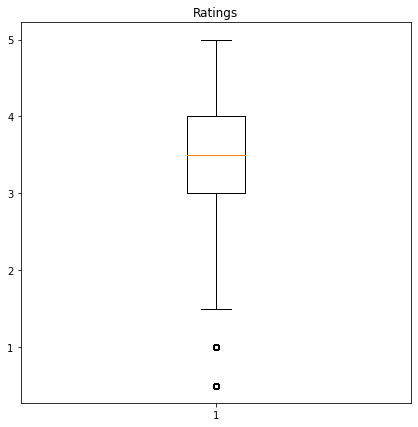

Comment: While there are a few movie with exceptionally low ratings, this is a subjective topic
 so we accept that some movies are going to have very low ratings.


In [44]:
# outliers
fig, axs = plt.subplots(figsize=(7,7))

axs.boxplot(movies.rating)
axs.set_title('Ratings')
plt.show()
print('Comment: While there are a few movie with exceptionally low ratings, this is a subjective topic\n so we accept that some movies are going to have very low ratings.')

 c. Outliers? <br>
 
 * while there are a few movie with exceptionally low ratings, this is a subjective topic so we accept that some movies are going to have very low ratings.
 
    d. Are those mistakes? <br>
* There were mistakes in the items file, namely we found 7 tmdbId's that were incorrect and that prevented us from being able to pull genre data from the movie database, but since we weren't able to discover this until after we shaped the data and there were only 7 of them, we decided it was ok to just move forward without those pieces of information.


    e. How do you deal with these problems?<br>
    * comments made in-line above

---
## Data Understanding [20 points total]
### <span style='color:blue'>Section 2: Vizualization [10 points]</span>
1. Visualize the any important attributes appropriately.<br>
2. <span style='color:red'><b>Important: Provide an interpretation for any charts or graphs.</b></span>
---

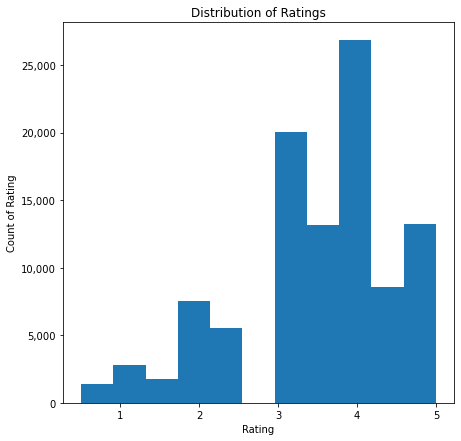

In [45]:
fig,ax = plt.subplots(figsize=(7,7))
ax.hist(ratings.rating, bins=11)
plt.xlabel('Rating')
plt.ylabel('Count of Rating')
plt.title('Distribution of Ratings')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()


###### Distribution Comments
Using the distribution of movie ratings we can see that most movies have either a 4 or a 3 rating and very few have a less than a 2 rating.

In [46]:
movies.columns

Index(['userId', 'rating', 'tag', 'title', 'release_year', 'Action',
       'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'rating_year',
       'rating_month', 'rating_day', 'rating_hour', 'tag_year', 'tag_month',
       'tag_day', 'tag_hour'],
      dtype='object')

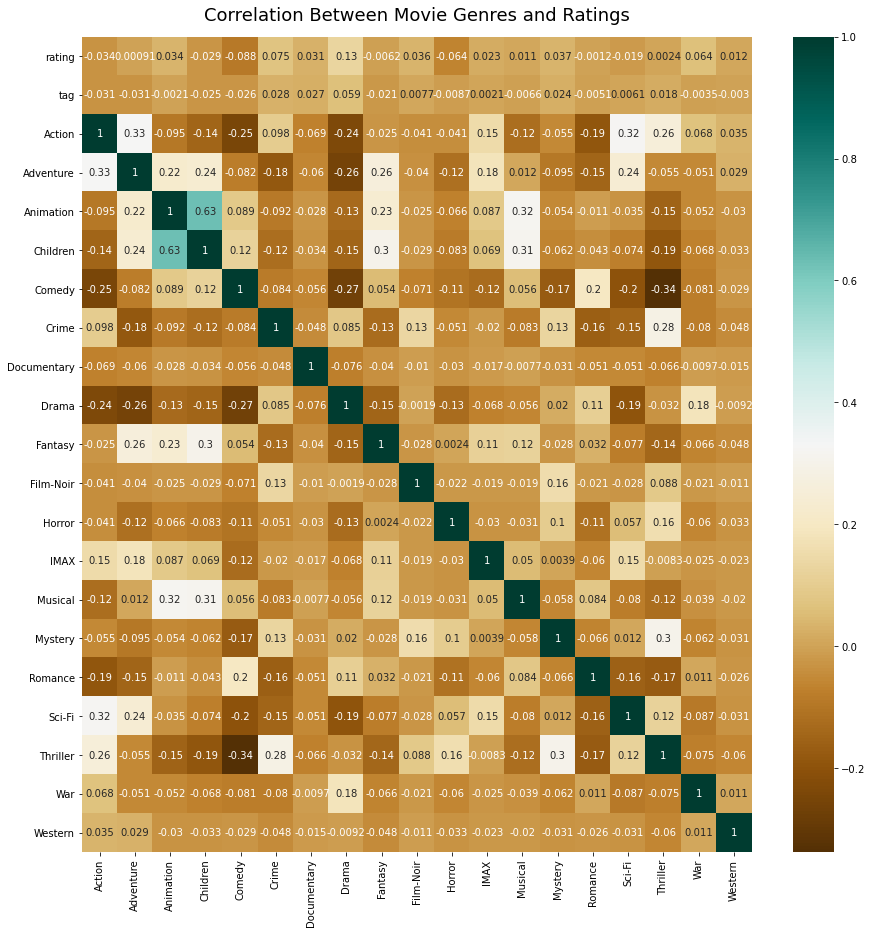

In [47]:
f, ax = plt.subplots(figsize=(15,15))
heatmap = sns.heatmap(movies.corr()[['Action',
       'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']], annot=True, cmap='BrBG')
heatmap.set_title('Correlation Between Movie Genres and Ratings', fontdict={'fontsize':18}, pad=16);
plt.show()

##### Correlation Heatmap Comments
From the correlatioin heatmap we can see that the only 2 genres that are highly correlated are Animation and Chilren, something to keep in mind as we are mining for association rules.

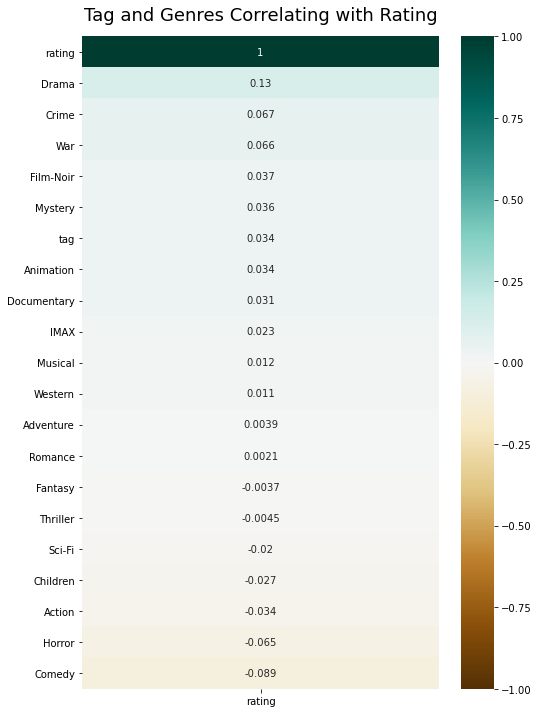

In [55]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(movies.corr()[['rating']].sort_values(by='rating', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Tag and Genres Correlating with Rating', fontdict={'fontsize':18}, pad=16);


##### Heatmap Comments
We see that Drama correlates the highest with rating, followed by Crime, War, Mystery, Film-Noir, Animation, Documentary, IMAX, Western, Musical, Thriller and Adventure while Romance, Fantasy, Sci-Fi, Children, Action, Horror and Comedy have negative correlation meaning that those genres tend to drive down a movie rating.
Since Adventure and Fantasy have such low correlation we consider they have very little impact on a movie's rating.

We can also see that having a tag isn't very highly correlated with a rating either.

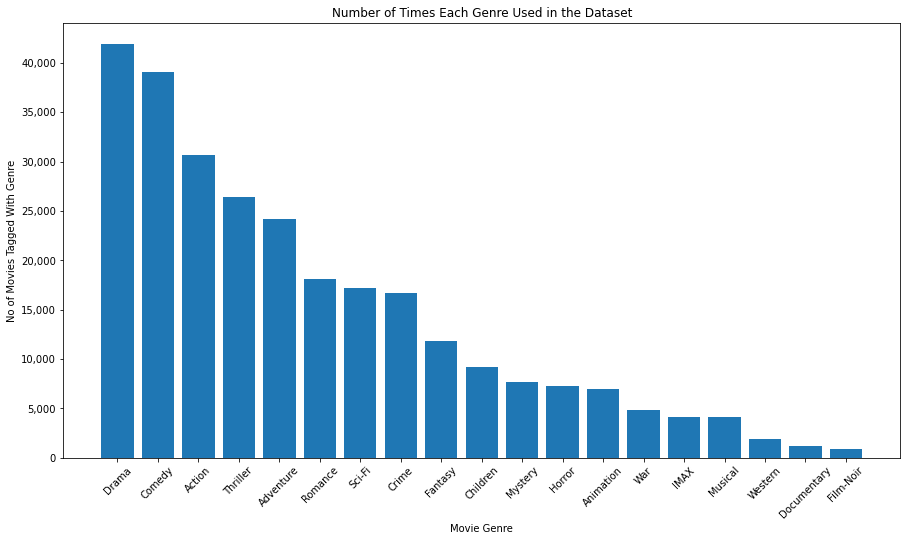

In [101]:
genre = ['Action',
       'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
df = pd.DataFrame()
df['genre_tot'] = movies.iloc[:,5:24].sum(axis=0).astype('int')
df.reset_index(inplace=True)
df.rename(columns = {'index':'genre'}, inplace=True)
df.sort_values('genre_tot', ascending=False, inplace=True)

f, ax = plt.subplots(figsize=(15,8))
ax.bar(df.genre, df.genre_tot)
plt.xlabel('Movie Genre')
plt.xticks(rotation=45)
plt.ylabel('No of Movies Tagged With Genre')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('Number of Times Each Genre Used in the Dataset')

plt.show()

###### Genre Usage Comments
Drama, Comedy, Action, Thriller and Adventure are the 5 most used genre titles in the dataset while IMAX, Musical, Western, Documentary and Film-Noir are the least used. This will more than likely come into play when determining which rules are the most important since the anything that is used less should present an interesting observation if it shows up as being more important.

In [59]:
movies.columns

Index(['userId', 'rating', 'tag', 'title', 'release_year', 'Action',
       'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'rating_year',
       'rating_month', 'rating_day', 'rating_hour', 'tag_year', 'tag_month',
       'tag_day', 'tag_hour'],
      dtype='object')

---
# Modeling & Evaluation [50 points total]
Different tasks will require different evaluation methods. Be as thorough as possible when analyzing the data you have chosen and use visualizations of the results to explain the performance and expected outcomes whenever possible. Guide the reader through your analysis with plenty of discussion of the results. Each option is broken down by:


## <span style='color:blue'>M&E Section 1: Train & Adjust Parameters [10 points]</span>
---

---
## <span style='color:blue'> M&E Section 2: Evaluate & Compare [10 points]</span>
- <b>Evaluate:</b> Use correct method for the model - Accuracy, Precision/Recall/ F-measure/ RMSE, MSE, AUC, RUC 
- <b>Compare:</b> Use statistical analysis that can be found at the bottom of Week 6 IPYNB
    - Example from Lab 2:
        > <span style='color:green'><b>from</b></span> sklearn.model_selection <span style='color:green'><b>import</b></span> cross_val_score<br>
        > #Q: Is clf1 better or worse than clf2? <br>
        > cv=StratifiedKFold(n_splits=10)<br>
        > acc1 = cross_val_score(clf1, X, y=y, cv=cv)<br>
        > acc2 = cross_val_score(clf2, X, y=y, cv=cv)<br>
        > acc1, acc2<br><br>
        <br>
        > t = scipy.stats.t.ppf(q=1-0.05/2,df=9)/ np.sqrt(10)
        > t = t / np.sqrt(10)<br>
        > e = (1-acc1)-(1-acc2)<br>
        > stdtot = np.std(e)<br>
        > dbar = np.mean(e)<br>
        > print ('Confidence Interval: %f, %f' <span style='color:blue'>%</span> (dbar - t * stdtot, dbar + t * stdtot) )\<br>
        > print ('Based on 95% CI, we fail or not to reject the null hypothesis that model 1 is different (or not) than model 2')<br>

---

---
## <span style='color:blue'>M&E Section 3: Visualize Results [10 points]</span>
- Confusion Matrix, Seaborn/ Yellowbrick/ Altair
- Example from Lab 2:
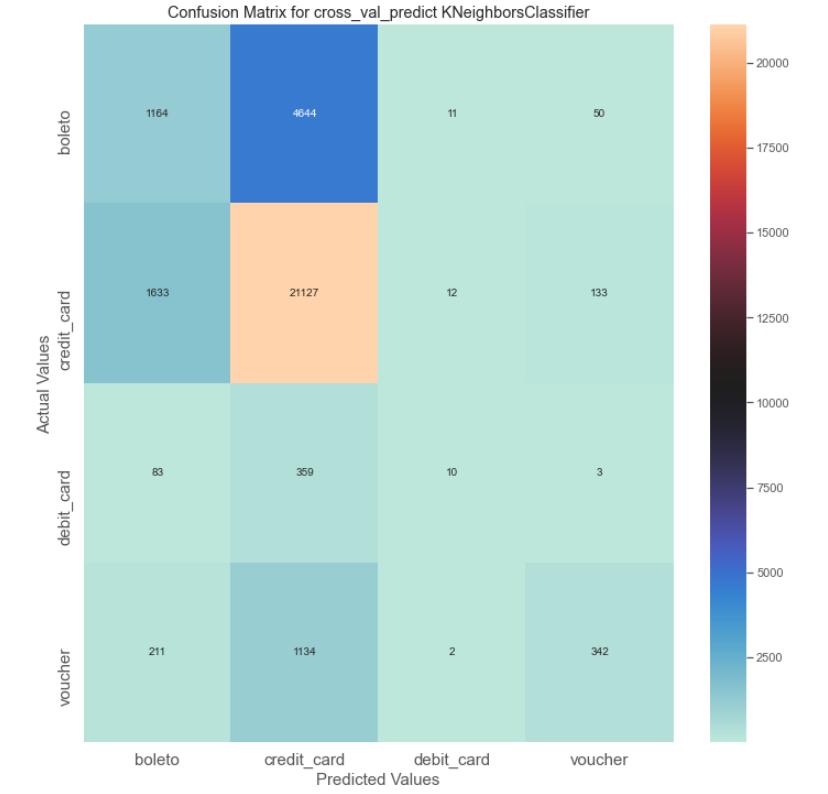
---

---
## <span style='color:blue'>M&E Section 4: Summarize the Ramifications [20 points]</span>
---

##### Option A: Cluster Analysis
- Train: Perform cluster analysis using several clustering methods (adjust parameters).
- Eval: Use internal and/or external validation measures to describe and compare the clusterings and the clusters— how did you determine a suitable number of clusters for each method?
- Visualize: Use tables/visualization to discuss the found results. Explain each visualization in detail.
- Summarize: Describe your results. What findings are the most interesting and why?
<br>

##### Option B: Association Rule Mining
- Train: Create frequent itemsets and association rules (adjust parameters).
- Eval: Use several measures for evaluating how interesting different rules are.
- Visualize: Use tables/visualization to discuss the found results.
- Summarize: Describe your results. What findings are the most compelling and why?
<br>

##### Option C: Collaborative Filtering
- Train: Create user-item matrices or item-item matrices using collaborative filtering (adjust parameters).
- Eval: Determine performance of the recommendations using different performance measures (explain the ramifications of each measure).
- Visualize: Use tables/visualization to discuss the found results. Explain each visualization in detail.
- Summarize: Describe your results. What findings are the most compelling and why?
<br>


---
## <span style='color:blue'>Deployment [10 points total]</span>
Be critical of your performance and tell the reader how you current model might be usable by other parties.
- Did you achieve your goals? If not, can you reign in the utility of your modeling?
- How useful is your model for interested parties (i.e., the companies or organizations that might want to use it)?
- How would you deploy your model for interested parties?
- What other data should be collected?
- How often would the model need to be updated, etc.?

---

---
## <span style='color:blue'>Exceptional Work [10 points total]</span>
You have free reign to provide additional analyses or combine analyses.

---